# CNN Modelling

### İmport NecessaryLibrary 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

### Load Data set

In [2]:
fileName=["X_train.pickle","X_val.pickle", "X_test.pickle","Y_train.pickle","Y_val.pickle","Y_test.pickle"]
datas=["X_train","X_val", "X_test","Y_train","Y_val","Y_test"]

In [3]:
for i in range(6):
    with open(fileName[i], 'rb') as data:
            datas[i]=pickle.load(data)
     
       

In [4]:
X_train=datas[0]
X_test=datas[1]
X_val=datas[2]

In [5]:
Y_train=datas[3]
Y_test=datas[4]
Y_val=datas[5]

In [6]:
X_train.shape,X_val.shape, X_test.shape

((7072, 16, 8, 1), (874, 16, 8, 1), (786, 16, 8, 1))

In [7]:
Y_train.shape,Y_val.shape,Y_test.shape

((7072, 10), (874, 10), (786, 10))

### Modelling

In [8]:
seed=42
tf.random.set_seed(seed)
model = Sequential()
input_dim = (16, 8, 1)    
model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 128)         0         
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [12]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_data=(X_val,Y_val), callbacks=[early_stop])

Epoch 1/100
221/221 [==============================] - 3s 11ms/step - loss: 2.1820 - accuracy: 0.2952 - val_loss: 1.7684 - val_accuracy: 0.4062
Epoch 2/100
221/221 [==============================] - 2s 10ms/step - loss: 1.6801 - accuracy: 0.4219 - val_loss: 1.5198 - val_accuracy: 0.5080
Epoch 3/100
221/221 [==============================] - 2s 10ms/step - loss: 1.5221 - accuracy: 0.4775 - val_loss: 1.3248 - val_accuracy: 0.5400
Epoch 4/100
221/221 [==============================] - 2s 10ms/step - loss: 1.3642 - accuracy: 0.5354 - val_loss: 1.3355 - val_accuracy: 0.5526
Epoch 5/100
221/221 [==============================] - 2s 10ms/step - loss: 1.2608 - accuracy: 0.5761 - val_loss: 1.1935 - val_accuracy: 0.6087
Epoch 6/100
221/221 [==============================] - 2s 10ms/step - loss: 1.2132 - accuracy: 0.6025 - val_loss: 1.1757 - val_accuracy: 0.6190
Epoch 7/100
221/221 [==============================] - 2s 10ms/step - loss: 1.0989 - accuracy: 0.6382 - val_loss: 1.2103 - val_accuracy:

### Evaluation

In [13]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
31,0.382637,0.876838,0.551077,0.844394
32,0.392288,0.874434,0.551142,0.848970
33,0.382058,0.879808,0.597884,0.845538
34,0.342374,0.889847,0.582370,0.854691
35,0.327798,0.892534,0.547809,0.864989


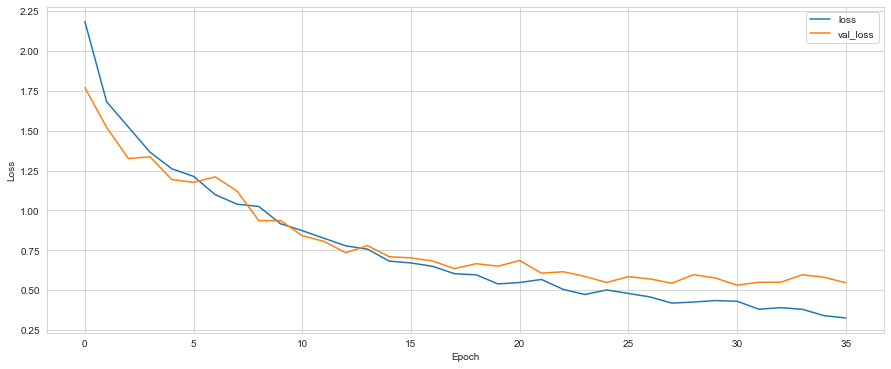

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

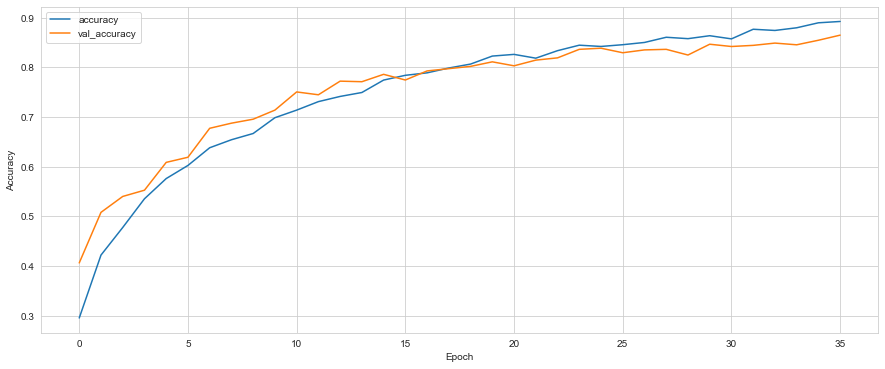

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [16]:
y_test=np.argmax(Y_test, axis=1)

In [17]:
print('TEST SCORE')
preds = model.predict(X_test)
predictions = np.argmax(preds, axis=1)
print(classification_report(y_test, predictions))

TEST SCORE
25/25 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        90
           1       0.93      0.64      0.76        39
           2       0.63      0.71      0.67        90
           3       0.81      0.58      0.68        90
           4       0.92      0.84      0.88        90
           5       0.87      0.96      0.91        90
           6       0.85      0.88      0.87        33
           7       0.89      0.96      0.92        90
           8       0.78      0.87      0.82        84
           9       0.76      0.76      0.76        90

    accuracy                           0.81       786
   macro avg       0.83      0.81      0.81       786
weighted avg       0.82      0.81      0.81       786



In [18]:
model.save("model_CNN_for_UrbanSounds.h5")

# Gridsearch

In [20]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Conv2D(64, (3, 3), padding = "same", activation = "relu", input_shape = input_dim))
    classifier.add(MaxPool2D(pool_size=(2, 2)))
    classifier.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
    classifier.add(MaxPool2D(pool_size=(2, 2)))
    classifier.add(Dropout(0.5))
    classifier.add(Flatten())
    classifier.add(Dense(1024, activation = "relu"))
    classifier.add(Dense(512, activation = "relu"))
    classifier.add(Dense(10, activation = "softmax"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = "categorical_crossentropy", metrics=['accuracy'])
    return classifier

In [21]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 5,restore_best_weights=True)

In [23]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_data=(X_val,Y_val), epochs = 100)

parameters = {'optimizer': [Adam,Nadam],
              'learn_rate': [0.001, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, Y_train, callbacks = [early_stop])

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Epoch 1/100
221/221 [==============================] - 4s 16ms/step - loss: 2.1773 - accuracy: 0.2827 - val_loss: 1.7565 - val_accuracy: 0.4359
Epoch 2/100
221/221 [==============================] - 3s 15ms/step - loss: 1.6846 - accuracy: 0.4150 - val_loss: 1.5022 - val_accuracy: 0.5080
Epoch 3/100
221/221 [==============================] - 3s 15ms/step - loss: 1.4859 - accuracy: 0.4854 - val_loss: 1.2970 - val_accuracy: 0.5446
Epoch 4/100
221/221 [==============================] - 3s 15ms/step - loss: 1.3585 - accuracy: 0.5395 - val_loss: 1.3422 - val_accuracy: 0.5629
Epoch 5/100
221/221 [==============================] - 3s 15ms/step - loss: 1.2302 - accuracy: 0.5868 - val_loss: 1.1310 - val_accuracy: 0.6259
Epoch 6/100
221/221 [==============================] - 3s 15ms/step - loss: 1.1819 - accuracy: 0.6127 - val_loss: 1.0469 - val_accuracy: 0.6670
Epoch 7/100
221/221 [==============================] - 3s 16ms/step - loss:

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002E08862F040>,
             n_jobs=-1,
             param_grid={'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [24]:
model.save("model_Tunned_CNN_for_UrbanSounds.h5")

In [25]:
grid_model.best_params_

{'learn_rate': 0.001, 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [37]:
print('TEST SCORE')
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

TEST SCORE
25/25 [==============================] - 0s 5ms/step
[[79  0  3  0  2  2  1  0  2  1]
 [ 1 32  2  0  0  1  0  0  3  0]
 [ 4  0 66  3  3  1  1  1  8  3]
 [ 0  0  8 64  3  2  0  0  9  4]
 [ 1  1  5  1 74  0  0  5  0  3]
 [ 0  0  1  0  0 88  0  0  1  0]
 [ 0  0  4  1  1  0 26  0  0  1]
 [ 3  1  3  0  3  1  1 76  1  1]
 [ 0  1  3  3  1  0  0  0 76  0]
 [ 3  1 13  4  2  3  0  1  1 62]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        90
           1       0.89      0.82      0.85        39
           2       0.61      0.73      0.67        90
           3       0.84      0.71      0.77        90
           4       0.83      0.82      0.83        90
           5       0.90      0.98      0.94        90
           6       0.90      0.79      0.84        33
           7       0.92      0.84      0.88        90
           8       0.75      0.90      0.82        84
           9       0.83      0.69      0.75        90

    accur